In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset_p1 = 'model/keypoint_classifier/keypoint_part1.csv'
dataset_p2 = 'model/keypoint_classifier/keypoint_part2.csv'
dataset_p3 = 'model/keypoint_classifier/keypoint_part3.csv'
dataset_p4 = 'model/keypoint_classifier/data.csv'
model_save_path = 'model/keypoint_classifier/newModel.hdf5'

In [3]:
NUM_CLASSES = 29

In [4]:
X_dataset1 = np.loadtxt(dataset_p1, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset1 = np.loadtxt(dataset_p1, delimiter=',', dtype='int32', usecols=(0))

In [5]:
X_dataset2 = np.loadtxt(dataset_p2, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset2 = np.loadtxt(dataset_p2, delimiter=',', dtype='int32', usecols=(0))
y_dataset2 = y_dataset2+10

In [8]:
X_dataset3 = np.loadtxt(dataset_p3, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset3 = np.loadtxt(dataset_p3, delimiter=',', dtype='int32', usecols=(0))
y_dataset3 = y_dataset3+20

In [9]:
X_dataset4 = np.loadtxt(dataset_p4, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset4 = np.loadtxt(dataset_p4, delimiter=',', dtype='int32', usecols=(0))

In [10]:
concat_x = np.concatenate((X_dataset1,X_dataset2),axis=0)
concat_x = np.concatenate((concat_x,X_dataset3),axis=0)
concat_x = np.concatenate((concat_x,X_dataset4),axis=0)

In [11]:
concat_y = np.concatenate((y_dataset1,y_dataset2),axis=0)
concat_y = np.concatenate((concat_y,y_dataset3),axis=0)
concat_y = np.concatenate((concat_y,y_dataset4),axis=0)
print(concat_y.shape)

(70789,)


In [12]:
concat_x.shape

(70789, 42)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(concat_x, concat_y, train_size=0.75, random_state=RANDOM_SEED)

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [41]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_14 (Dropout)        (None, 42)                0         
                                                                 
 dense_17 (Dense)            (None, 256)               11008     
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               131584    
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_17 (Dropout)        (None, 1024)             

In [42]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

In [43]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [44]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=512,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)]
)

Epoch 1/1000
103/104 [============================>.] - ETA: 0s - loss: 1.9123 - accuracy: 0.3983
Epoch 00001: saving model to model/keypoint_classifier/newModel.hdf5
104/104 [==============================] - 6s 53ms/step - loss: 1.9074 - accuracy: 0.3995 - val_loss: 0.7656 - val_accuracy: 0.7764
Epoch 2/1000
103/104 [============================>.] - ETA: 0s - loss: 1.0847 - accuracy: 0.6369
Epoch 00002: saving model to model/keypoint_classifier/newModel.hdf5
104/104 [==============================] - 5s 52ms/step - loss: 1.0841 - accuracy: 0.6369 - val_loss: 0.5583 - val_accuracy: 0.8273
Epoch 3/1000
103/104 [============================>.] - ETA: 0s - loss: 0.9118 - accuracy: 0.6965
Epoch 00003: saving model to model/keypoint_classifier/newModel.hdf5
104/104 [==============================] - 6s 55ms/step - loss: 0.9113 - accuracy: 0.6967 - val_loss: 0.5053 - val_accuracy: 0.8245
Epoch 4/1000
103/104 [============================>.] - ETA: 0s - loss: 0.8122 - accuracy: 0.7332
Epoch

Epoch 29/1000
104/104 [==============================] - ETA: 0s - loss: 0.4322 - accuracy: 0.8604
Epoch 00029: saving model to model/keypoint_classifier/newModel.hdf5
104/104 [==============================] - 7s 71ms/step - loss: 0.4322 - accuracy: 0.8604 - val_loss: 0.2944 - val_accuracy: 0.9119
Epoch 30/1000
103/104 [============================>.] - ETA: 0s - loss: 0.4284 - accuracy: 0.8603
Epoch 00030: saving model to model/keypoint_classifier/newModel.hdf5
104/104 [==============================] - 7s 68ms/step - loss: 0.4289 - accuracy: 0.8602 - val_loss: 0.3254 - val_accuracy: 0.8973
Epoch 31/1000
104/104 [==============================] - ETA: 0s - loss: 0.4235 - accuracy: 0.8628
Epoch 00031: saving model to model/keypoint_classifier/newModel.hdf5
104/104 [==============================] - 7s 65ms/step - loss: 0.4235 - accuracy: 0.8628 - val_loss: 0.3501 - val_accuracy: 0.8936
Epoch 32/1000
104/104 [==============================] - ETA: 0s - loss: 0.4209 - accuracy: 0.8646
E

In [45]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=512)

35/35 [==============================] - 1s 16ms/step - loss: 0.3243 - accuracy: 0.8951


In [46]:
model = tf.keras.models.load_model(model_save_path)

In [47]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[4.1862400e-08 1.6644022e-07 3.6700806e-07 9.9989176e-01 9.0237438e-07
 3.1694064e-05 8.8358561e-08 3.5916184e-08 6.2334817e-05 2.8603038e-09
 1.3386141e-06 6.2401814e-06 3.7329333e-08 4.9752671e-08 3.6511346e-07
 1.5794779e-12 1.3997386e-18 1.4925945e-06 8.9205709e-09 5.7792726e-09
 1.5357947e-06 4.4641899e-07 2.2600815e-09 4.6591782e-07 6.5677006e-07
 3.4126000e-08 4.2586812e-08 1.6259690e-18 8.5889167e-16]
3


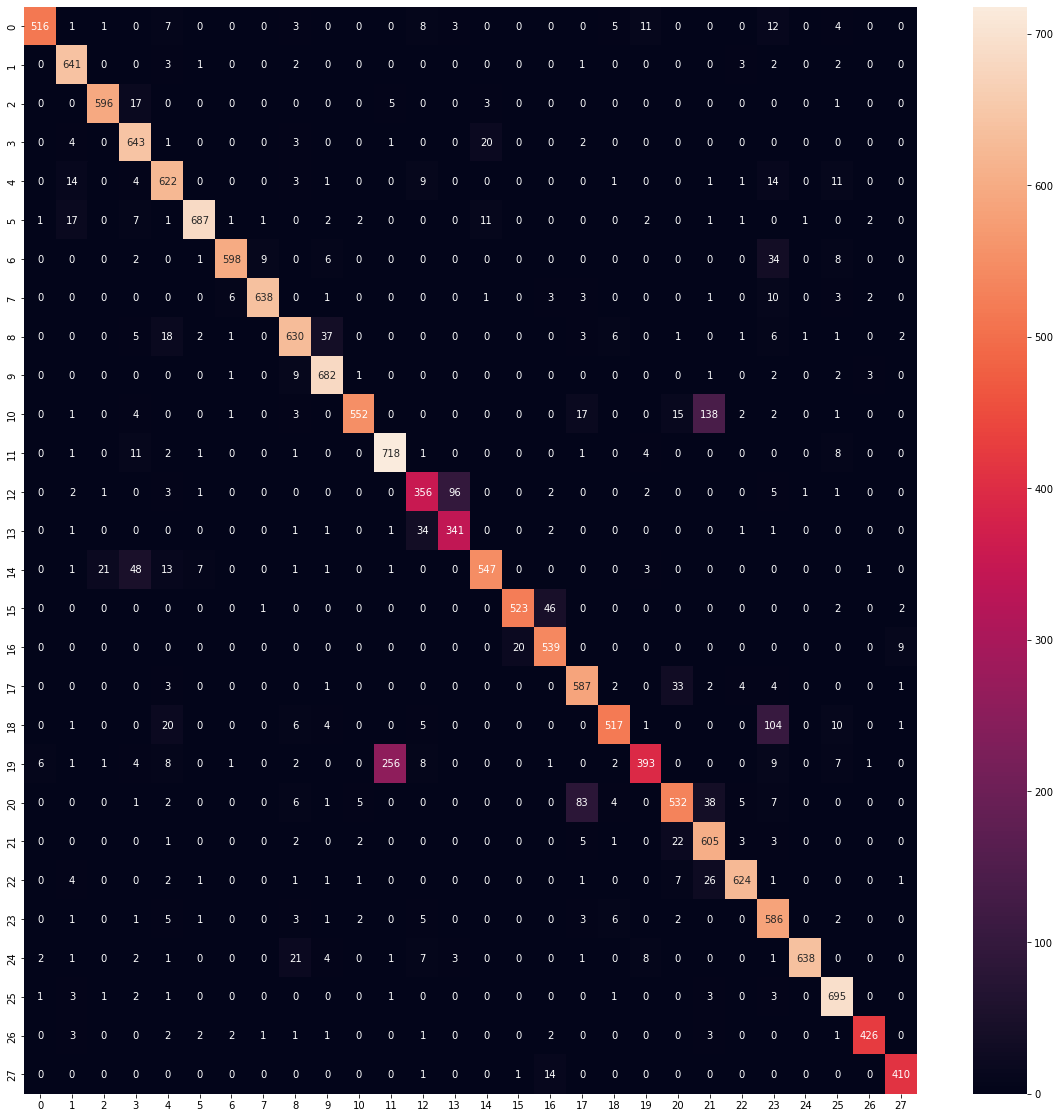

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       571
           1       0.92      0.98      0.95       655
           2       0.96      0.96      0.96       622
           3       0.86      0.95      0.90       674
           4       0.87      0.91      0.89       681
           5       0.98      0.93      0.95       737
           6       0.98      0.91      0.94       658
           7       0.98      0.96      0.97       668
           8       0.90      0.88      0.89       714
           9       0.92      0.97      0.94       701
          10       0.98      0.75      0.85       736
          11       0.73      0.96      0.83       748
          12       0.82      0.76      0.79       470
          13       0.77      0.89      0.83       383
          14       0.94      0.85      0.89       644
          15       0.96      0.91      0.94       574
          16       0.89      0.95      0.92       568
     

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite

In [50]:
model.save(model_save_path, include_optimizer=False)

In [ ]:
#--doneee-----

In [35]:
tflite_save_path = 'model/keypoint_classifier/alpha_clf.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\LAPTOP~1\AppData\Local\Temp\tmptzjxwvhz\assets


8416

In [36]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [37]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [38]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [39]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 2.36 ms


In [40]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.5452247e-01 1.0898571e-04 8.2036621e-07 7.3600160e-05 9.3638782e-06
 3.7210332e-06 1.4782027e-07 6.2996434e-04 2.2291286e-05 2.6794480e-05
 2.2813518e-10 1.7536161e-10 7.5322172e-11 7.0934980e-11 1.5375309e-10
 1.0157168e-10 4.2755038e-10 3.8340503e-10 1.1011170e-10 6.9636512e-11
 2.2658289e-03 6.0953522e-01 3.2798070e-02 2.6595790e-06 1.3648225e-09
 2.1177215e-08]
21
